# S&P 500 Portfolio Optimization  
### *Comparing Mean-Variance Optimization vs. Equal-Weighted Strategies*  

**Goal**:  
- Apply Modern Portfolio Theory (MPT) to optimize an S&P 500 stock portfolio.  
- Compare performance against a naive equal-weighted benchmark.  

**Key Questions**:  
1. Does optimization improve risk-adjusted returns (Sharpe ratio)?  
2. How sensitive is the optimized portfolio to input parameters?  

**Tools**:  
- Python (Pandas, NumPy, SciPy)  
- Efficient Frontier (`PyPortfolioOpt`)  

**Dataset**:  
- S&P 500 Stock Data https://www.kaggle.com/datasets/camnugent/sandp500

## Step One: Import Our Libraries

1. **Pandas** - Grabbing and transforming data
2. **Matplotlib** - Build visuals for analysis
3. **Numpy** - Conducting calculations
4. **Sklearn** - Used to cluster the stocks
5. **Pypfopt** - Plotting efficient frontier

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import zscore
from numpy import cov
from pypfopt import EfficientFrontier, plotting



## Step Two: Load The Data

We need the data in a DataFrame in order to properly manipulate the data and analyze it effectively


In [118]:
path = r"C:\Users\awai2670\Downloads\all_stocks_5yr.csv.zip"

df = pd.read_csv(path)

prices = df.pivot(index='date', columns='Name', values='close')

prices = prices.loc['2015-01-01':'2018-12-31']  

prices.head()

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,40.56,53.910,158.56,109.33,65.89,90.46,44.90,88.84,72.340,55.540,...,34.45,43.600,92.83,51.93,55.00,38.08,72.35,112.59,28.290,43.31
2015-01-05,39.80,53.875,156.47,106.25,64.65,89.69,44.91,87.34,71.980,54.525,...,34.66,42.795,90.29,51.57,53.80,35.71,70.88,116.79,27.230,43.05
2015-01-06,39.18,53.040,156.36,106.26,64.33,90.18,44.40,86.71,70.530,53.250,...,34.83,42.180,89.81,50.93,53.08,35.50,70.01,115.80,26.190,42.63
2015-01-07,39.70,53.010,159.72,107.75,66.93,91.98,44.76,88.53,71.110,53.810,...,34.85,42.195,90.72,52.25,53.76,35.78,72.33,118.68,26.435,43.51
2015-01-08,40.89,53.660,161.12,111.89,67.63,92.19,45.68,89.88,72.915,54.760,...,35.42,43.135,92.23,53.54,55.24,36.05,73.59,119.94,26.810,44.18


## Step Three: Calculatioins

There are calculations we need in order to optimize the portfolio such as log returns, annual returns, annual volatility and sharpe ratios

In [119]:
log_ret = np.log(prices/prices.shift(1)).dropna()


annual_ret = log_ret.mean() * 252
annual_vol = log_ret.std() * np.sqrt(252)
sharpe = annual_ret / annual_vol

metrics = pd.DataFrame({'LogReturns' : annual_ret,
                       'Volatility' : annual_vol,
                       'Sharpe' : sharpe
                       }).dropna()

metrics.head()

,LogReturns,Volatility,Sharpe
Name,,,
A,0.195236,0.192299,1.015269
AAL,0.224290,0.322415,0.695656
AAP,0.487821,0.326841,1.492534
AAPL,-0.359738,0.224268,-1.604056
ABBV,1.023683,0.417369,2.452703


## Step Four: Clustering

Since we have so many stocks we can cluster stocks that behave in similar ways.

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Inertia: 685.97
Silhouette score: 0.316
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Inertia: 458.05
Silhouette score: 0.364
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Inertia: 361.12
Silhouette score: 0.365
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Inertia: 304.46
Silhouette score: 0.346
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Inertia: 251.00
Silhouette score: 0.337
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Inertia: 223.70
Silhouette score: 0.327
----------------------

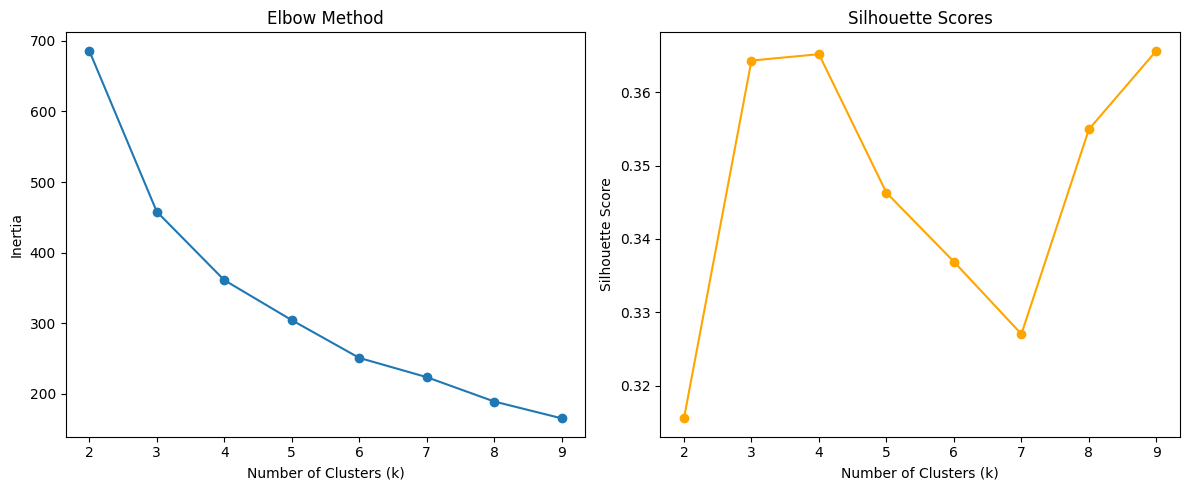

In [120]:
scaler = StandardScaler()

scaled_metrics = scaler.fit_transform(metrics[['LogReturns', 'Volatility']]) 

inertias = []
sil_scores = []

for k in range (2, 10):
    
    kmeans = KMeans(n_clusters=k, random_state = 0).fit(scaled_metrics)
    cluster_labels = kmeans.fit_predict(scaled_metrics)
    
    sil_score = silhouette_score(scaled_metrics, cluster_labels)
    inertia = kmeans.inertia_
    
    inertias.append(inertia)        
    sil_scores.append(sil_score)
    
    print("-"*100)
    print(f"Number of Clusters: {k}")
    print(f"Inertia: {inertia:.2f}")
    print(f"Silhouette score: {sil_score:.3f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), sil_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()



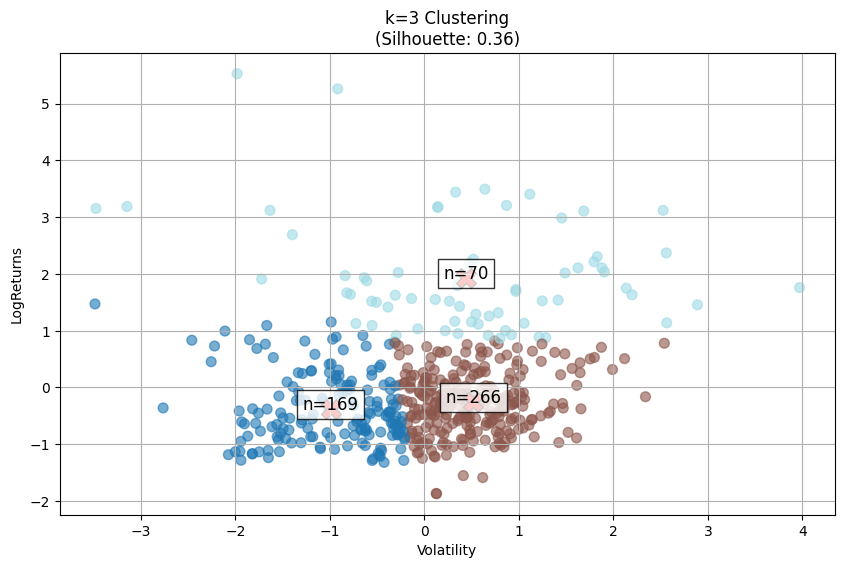

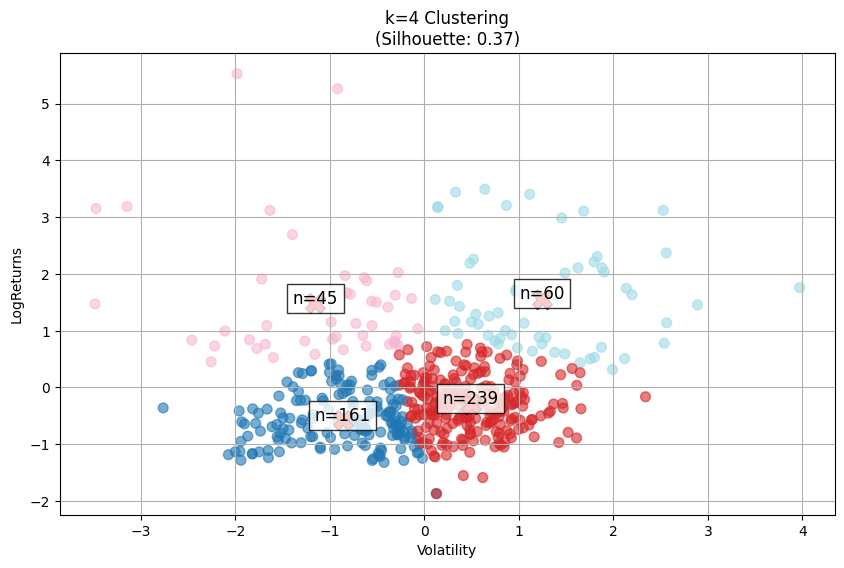

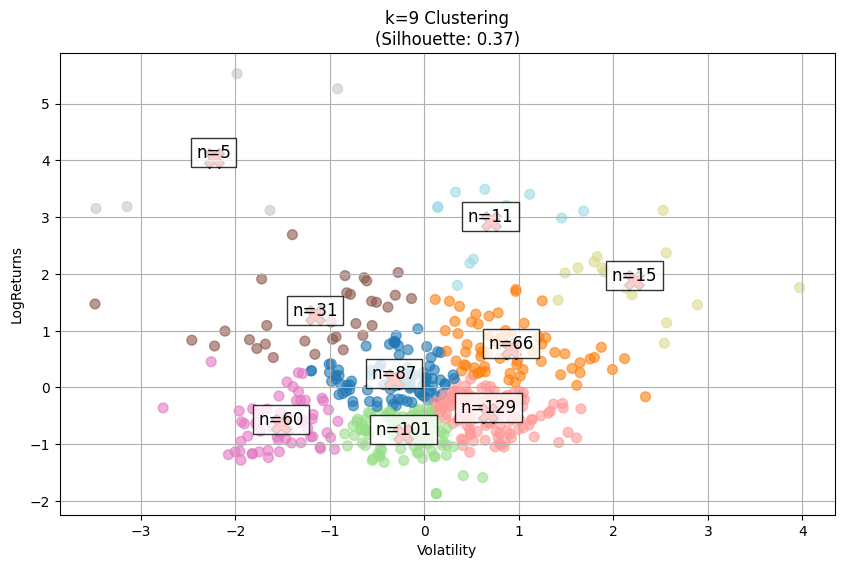

In [121]:
for cluster in [3,4,9]:
    
    kmeans = KMeans(n_clusters=cluster, random_state = 0).fit(scaled_metrics)
    labels = kmeans.labels_

    
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]


    plt.figure(figsize=(10,6))

    scatter = plt.scatter(
        scaled_metrics[:,0], 
        scaled_metrics[:,1], 
        c=labels, 
        cmap='tab20',  
        alpha=0.6,
        s=50
    )

    centers = kmeans.cluster_centers_
    plt.scatter(
        centers[:,0], centers[:,1],
        marker='X', s=200, c='red', 
        edgecolor='black', linewidth=1
    )
    
    for i in range(cluster):
        cluster_points = scaled_metrics[labels == i]
        plt.text(
            centers[i,0], centers[i,1],
            f'n={len(cluster_points)}',
            fontsize=12,
            ha='center',
            bbox=dict(facecolor='white', alpha=0.8)
        )
    plt.xlabel('Volatility')
    plt.ylabel('LogReturns')
    plt.title(f'k={cluster} Clustering\n(Silhouette: {silhouette_score(scaled_metrics, labels):.2f})')
    plt.grid(True)
    plt.show()

Since we have outliers it is a good idea to try and clean the data by dropping the stocks with higher volatility

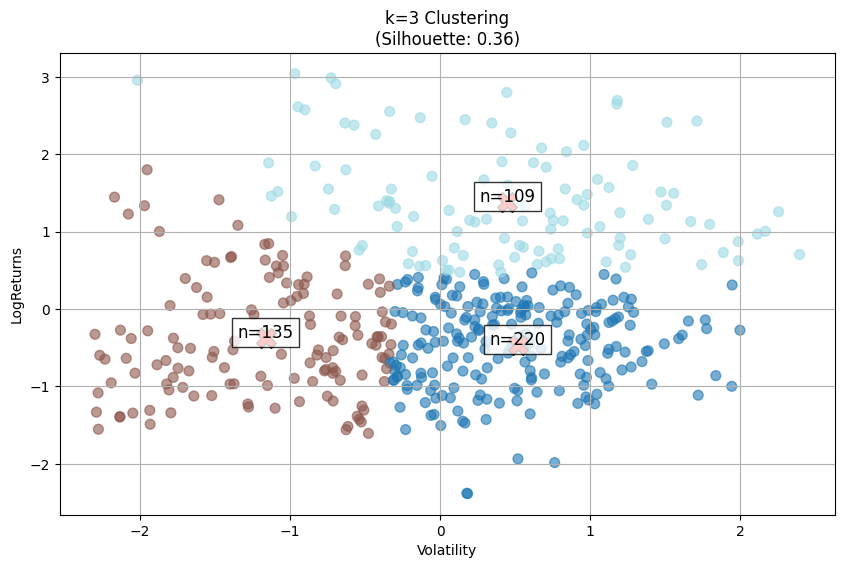

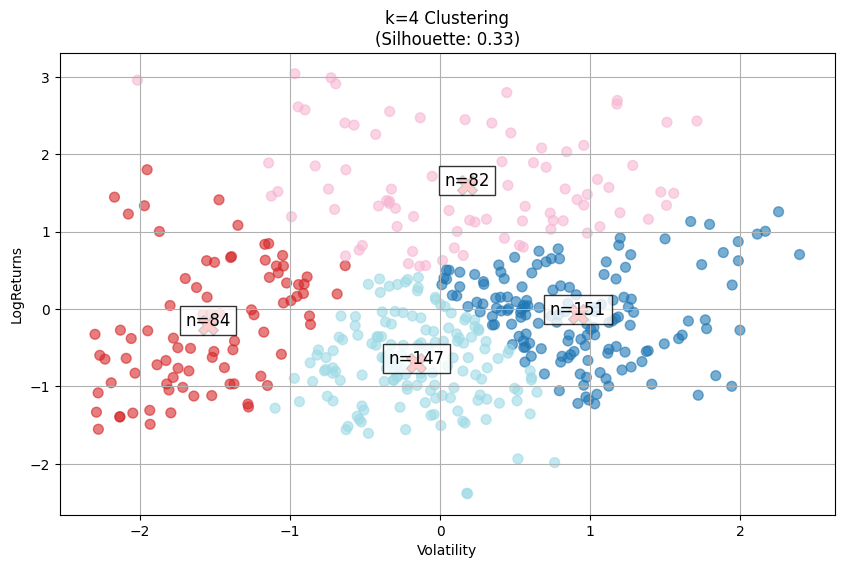

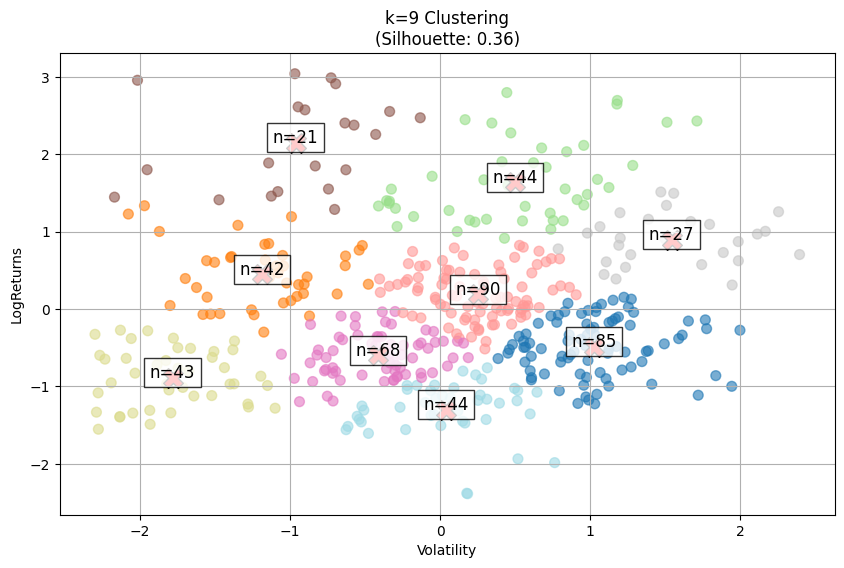

In [122]:
z_scores = np.abs(zscore(metrics[['LogReturns','Volatility']]))
                  
metrics = metrics[(z_scores < 2).all(axis=1)]

scaler = StandardScaler()

scaled_metrics = scaler.fit_transform(metrics[['LogReturns', 'Volatility']]) 

for cluster in [3,4,9]:
    
    kmeans = KMeans(n_clusters=cluster, random_state = 0).fit(scaled_metrics)
    labels = kmeans.labels_

    
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]


    plt.figure(figsize=(10,6))

    scatter = plt.scatter(
        scaled_metrics[:,0], 
        scaled_metrics[:,1], 
        c=labels, 
        cmap='tab20', 
        alpha=0.6,
        s=50
    )

    centers = kmeans.cluster_centers_
    plt.scatter(
        centers[:,0], centers[:,1],
        marker='X', s=200, c='red', 
        edgecolor='black', linewidth=1
    )
    
    for i in range(cluster):
        cluster_points = scaled_metrics[labels == i]
        plt.text(
            centers[i,0], centers[i,1],
            f'n={len(cluster_points)}',
            fontsize=12,
            ha='center',
            bbox=dict(facecolor='white', alpha=0.8)
        )
    plt.xlabel('Volatility')
    plt.ylabel('LogReturns')
    plt.title(f'k={cluster} Clustering\n(Silhouette: {silhouette_score(scaled_metrics, labels):.2f})')
    plt.grid(True)
    plt.show()

The optimal K value seems to be 3 clusters. Now we can select stocks with the highest sharpe ratio from these stocks and create the portfolio.

----------------------------------------------------------------------------------------------------
Cluster sizes: Cluster
0    220
1    135
2    109
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


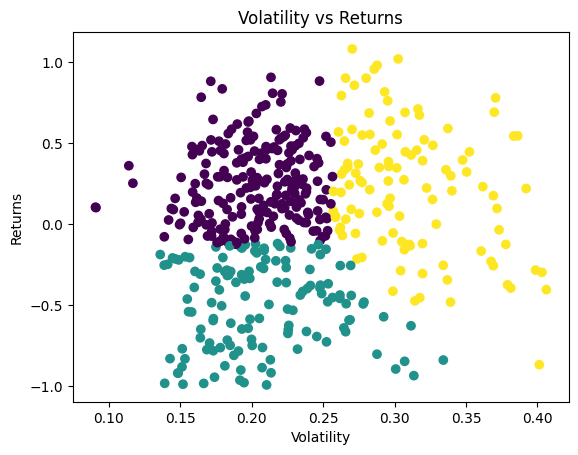

In [123]:
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(metrics[['LogReturns', 'Volatility']]) 

kmeans = KMeans(n_clusters=3, random_state = 0)
metrics['Cluster'] = kmeans.fit_predict(scaled_metrics)

print("-"*100)
print(f"Cluster sizes: {metrics['Cluster'].value_counts()}")
print("-"*100)

plt.scatter(metrics['Volatility'], metrics['LogReturns'], c=metrics['Cluster'], cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Volatility vs Returns')
plt.show()

## Step Five: Optimizing the portfolio

Now that we have decided the optimal cluster we can select the stocks and optimize the portfolio.



In [124]:
selected_stocks = metrics.sort_values('Sharpe',  ascending = False).groupby('Cluster').head(7)

selected_stocks

,LogReturns,Volatility,Sharpe,Cluster
Name,,,,
MA,0.882996,0.171457,5.149945,0
VFC,0.784325,0.164771,4.760093,0
TSS,0.836051,0.179463,4.658635,0
FLR,0.907163,0.213573,4.247556,0
TPR,1.082543,0.270406,4.003402,2
ADBE,0.808993,0.214727,3.767551,0
PVH,0.647607,0.173052,3.742275,0
EW,0.805192,0.221348,3.637677,0
HCA,0.981939,0.287862,3.411143,2


In [125]:
returns = prices[selected_stocks.index].pct_change().dropna()

mu = (1+returns.mean())**252 - 1

cov = returns.cov() * 252

ef_sharpe = EfficientFrontier(mu, cov)
weights_sharpe = ef_sharpe.max_sharpe(0.02)
cleaned_sharpe = ef_sharpe.clean_weights()

ef_vol = EfficientFrontier(mu, cov)
weights_vol = ef_vol.min_volatility()
cleaned_vol = ef_vol.clean_weights()

print("Max Sharpe Portfolio:")
print({k: f"{v:.2%}" for k, v in cleaned_sharpe.items()})
ef_sharpe.portfolio_performance(risk_free_rate=0.02, verbose=True)

print("\nMin Volatility Portfolio:")
print({k: f"{v:.2%}" for k, v in cleaned_vol.items()})
ef_vol.portfolio_performance(risk_free_rate=0.02, verbose=True)


Max Sharpe Portfolio:
{'MA': '0.00%', 'VFC': '0.00%', 'TSS': '26.56%', 'FLR': '0.00%', 'TPR': '0.00%', 'ADBE': '26.80%', 'PVH': '0.00%', 'EW': '8.63%', 'HCA': '0.00%', 'HP': '0.00%', 'EA': '9.55%', 'TGT': '0.00%', 'ATVI': '28.45%', 'LOW': '0.00%', 'PCAR': '0.00%', 'PX': '0.00%', 'C': '0.00%', 'AMP': '0.00%', 'DIS': '0.00%', 'AFL': '0.00%', 'CBG': '0.00%'}
Expected annual return: 43.8%
Annual volatility: 19.4%
Sharpe Ratio: 2.15

Min Volatility Portfolio:
{'MA': '3.70%', 'VFC': '4.01%', 'TSS': '0.00%', 'FLR': '0.00%', 'TPR': '0.00%', 'ADBE': '1.77%', 'PVH': '0.00%', 'EW': '2.18%', 'HCA': '6.29%', 'HP': '0.00%', 'EA': '6.55%', 'TGT': '10.14%', 'ATVI': '0.87%', 'LOW': '4.13%', 'PCAR': '0.00%', 'PX': '20.67%', 'C': '0.00%', 'AMP': '0.00%', 'DIS': '14.28%', 'AFL': '25.41%', 'CBG': '0.00%'}
Expected annual return: 13.0%
Annual volatility: 12.6%
Sharpe Ratio: 0.87


(np.float64(0.13028716771077878),
 np.float64(0.12641685456202814),
 np.float64(0.8724087313584035))

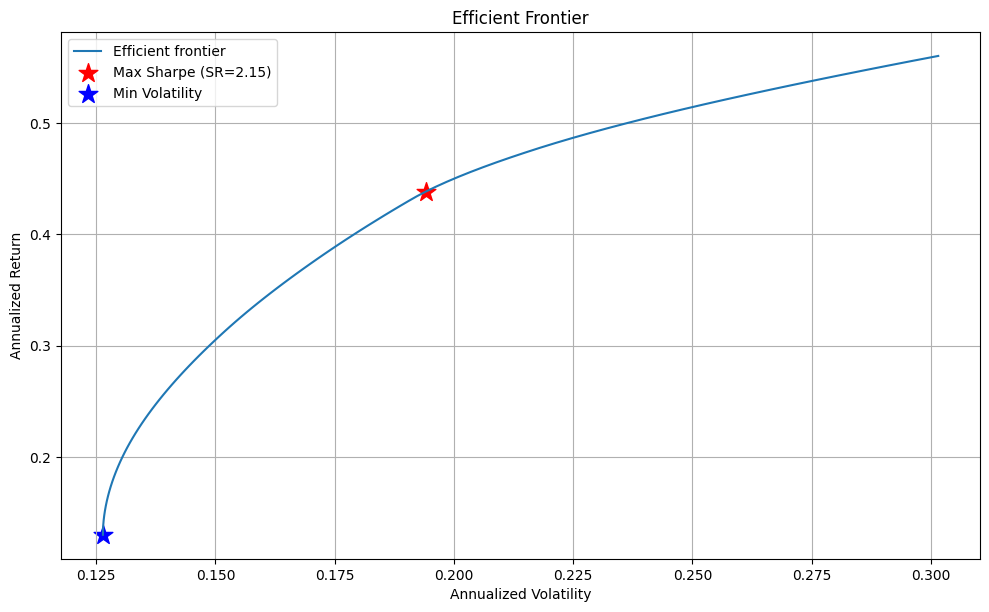

In [126]:
ef = EfficientFrontier(mu, cov)

fig, ax = plt.subplots(figsize=(10, 6))

plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

ef_sharpe = EfficientFrontier(mu, cov)
ef_sharpe.max_sharpe(risk_free_rate=0.02)
ret_sharpe, vol_sharpe, sharpe_ratio = ef_sharpe.portfolio_performance(risk_free_rate=0.02, verbose=False)

ax.scatter(
    vol_sharpe, ret_sharpe,
    marker="*", s=200, c="red",
    label=f"Max Sharpe (SR={sharpe_ratio:.2f})"
)

ef_vol = EfficientFrontier(mu, cov)  
ef_vol.min_volatility()
ret_vol, vol_vol, _ = ef_vol.portfolio_performance(verbose=False)

ax.scatter(
    vol_vol, ret_vol,
    marker="*", s=200, c="blue",
    label="Min Volatility"
)

ax.legend()
ax.set_title("Efficient Frontier")
ax.set_xlabel("Annualized Volatility")
ax.set_ylabel("Annualized Return")
plt.grid(True)
plt.show()






## Step Six: Testing the portfolio

We created the portfolio using 2015-2019 data so now we can test it on 2019-2020 data

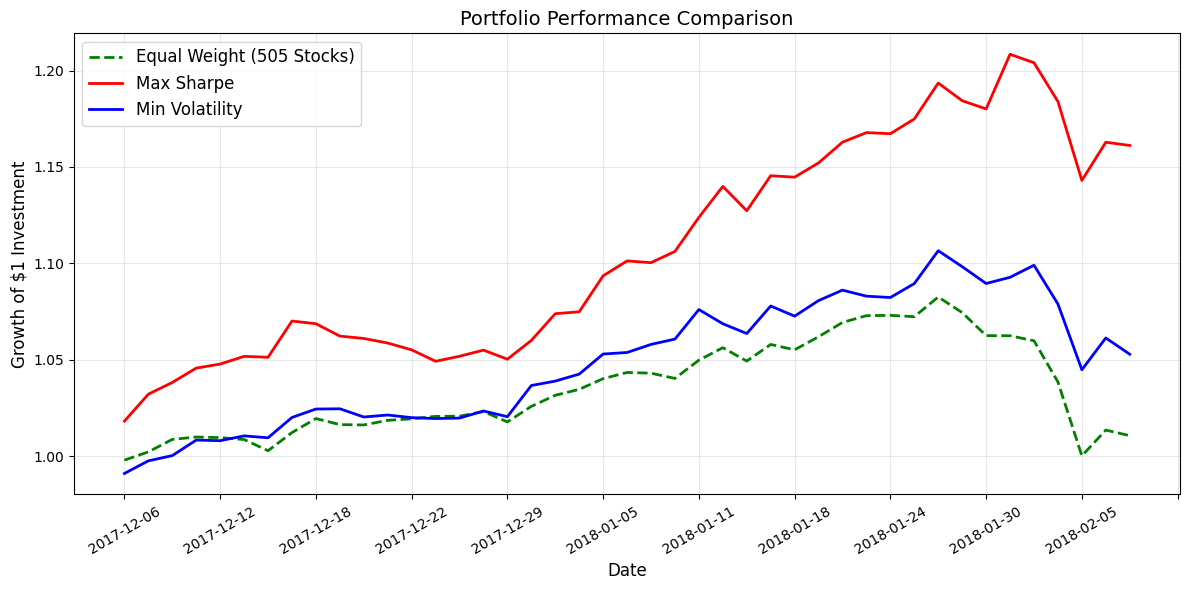

In [127]:
prices_clean = prices.ffill().dropna()



returns = prices_clean.pct_change(fill_method=None).dropna()


weights_equal = np.ones(len(returns.columns)) / len(returns.columns)
returns_equal = returns @ weights_equal

valid_stocks_sharpe = [s for s in weights_sharpe if s in returns.columns]
valid_stocks_vol = [s for s in weights_vol if s in returns.columns]

returns_sharpe = returns[valid_stocks_sharpe] @ pd.Series(weights_sharpe)[valid_stocks_sharpe]
returns_vol = returns[valid_stocks_vol] @ pd.Series(weights_vol)[valid_stocks_vol]


cumulative_equal = (1 + returns_equal).cumprod()
cumulative_sharpe = (1 + returns_sharpe).cumprod()
cumulative_vol = (1 + returns_vol).cumprod()


plt.figure(figsize=(12, 6))
plt.plot(cumulative_equal, label=f'Equal Weight ({len(returns.columns)} Stocks)', 
         color='green', linestyle='--', linewidth=2)
plt.plot(cumulative_sharpe, label='Max Sharpe', 
         color='red', linewidth=2)
plt.plot(cumulative_vol, label='Min Volatility', 
         color='blue', linewidth=2)

plt.title('Portfolio Performance Comparison', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.autoscale()
plt.xticks(rotation=30)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.ylabel('Growth of $1 Investment', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [128]:
weights_equal = {stock: 1/len(mu) for stock in mu.index}
ef_equal = EfficientFrontier(mu, cov)
ef_equal.set_weights(weights_equal)
equal_perf = ef_equal.portfolio_performance(risk_free_rate=0.02)

ef_sharpe = EfficientFrontier(mu, cov)
weights_sharpe = ef_sharpe.max_sharpe(risk_free_rate=0.02)
sharpe_perf = ef_sharpe.portfolio_performance(risk_free_rate=0.02)

ef_vol = EfficientFrontier(mu, cov)
weights_vol = ef_vol.min_volatility()
vol_perf = ef_vol.portfolio_performance(risk_free_rate=0.02)

perf_data = [
    ["Equal Weight", *equal_perf],
    ["Max Sharpe", *sharpe_perf],
    ["Min Volatility", *vol_perf]
]

df = pd.DataFrame(
    perf_data,
    columns=["Portfolio", "Expected Return", "Volatility", "Sharpe Ratio"]
).set_index("Portfolio")

print(df.round(3))

                Expected Return  Volatility  Sharpe Ratio
Portfolio                                                
Equal Weight              0.178       0.150         1.050
Max Sharpe                0.438       0.194         2.155
Min Volatility            0.130       0.126         0.872


## Conclusion:

As we can see from the graph and the Minimum Variance portfolio reported a lower variance(2.4% lower) than the equal weight portfolio and the Max Sharpe portfolio reported a higher Sharpe Ratio(1.105 higher) than the equal weight portfolio.